# Guide Line for gradient_input

In [1]:
import os
import pandas as pd
import numpy as np
import prediction_painter
import import_ipynb
from model_dev import rmse
from gradient_input import GradientInput

importing Jupyter notebook from Model_dev.ipynb
importing Jupyter notebook from model_dev.ipynb


## Begin with log file

In [2]:
df_log = pd.read_csv("Log/Models.csv", index_col=0)
df_log['Model_path'] = df_log['Model_path'].apply(lambda x: x.replace('C:\\Users\\wasin\\Downloads\\Work\\PG(HKU)\\FYP\\Program_Data\\',''))
df_log.to_csv(os.path.join(os.getcwd(), "Log", "Models.csv"))

In [3]:
df_log.tail(10)

,Time,Model_path,Algorithm,Loss,Validation Loss,Country,Features
698,20211028 18-11,Models\20211028 18-11C-LSTM,C-LSTM,0.002444,0.062949,United States,PCS
699,20211028 20-07,Models\20211028 20-07LSTM,LSTM,0.003430,0.115070,United States,P
700,20211028 20-07,Models\20211028 20-07Attention,Attention,0.032721,0.121143,United States,P
701,20211028 20-07,Models\20211028 20-07C-LSTM,C-LSTM,0.003097,0.143342,United States,P
702,20211028 20-26,Models\20211028 20-26LSTM,LSTM,0.002320,0.142633,United States,PC
703,20211028 20-26,Models\20211028 20-26Attention,Attention,0.018092,0.113836,United States,PC
704,20211028 20-26,Models\20211028 20-26C-LSTM,C-LSTM,0.004257,0.137845,United States,PC
705,20211028 20-45,Models\20211028 20-45LSTM,LSTM,0.002555,0.095905,United States,PCS
706,20211028 20-45,Models\20211028 20-45Attention,Attention,0.012222,0.106601,United States,PCS
707,20211028 20-45,Models\20211028 20-45C-LSTM,C-LSTM,0.002444,0.062949,United States,PCS


##### Reshape and MinMaxScale input #####
(536, 14, 26) (536, 7, 1) (60, 14, 26) (60, 7, 1)


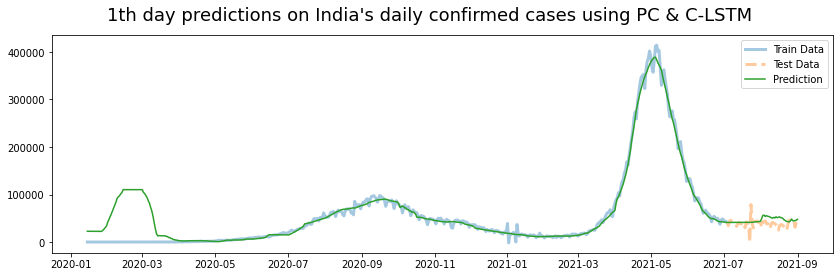

In [4]:
algo, model_path, f_flag, country = prediction_painter.plot_from_dataframe(df_log,677,custom_objects= dict(loss=rmse))

## Create GradientInput object

In [5]:
India_gradient = GradientInput(algo, model_path, f_flag, country)

##### Reshape and MinMaxScale input #####
(536, 14, 26) (536, 7, 1) (60, 14, 26) (60, 7, 1)
C-LSTM Models\20211027 20-15C-LSTM PC India
X shape: (596, 14, 26)  y shape: (596, 7, 1)
Date Range:1/1/2020~1/9/2021


## Check '1/7/2021' 

 28%|█████████████████████▉                                                         | 277/1000 [00:34<01:29,  8.10it/s]


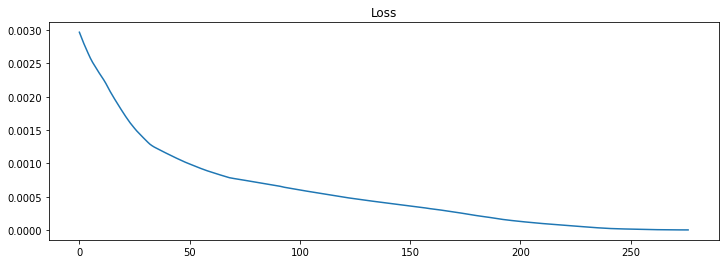

TypeError: y_inverse_scaler() takes 2 positional arguments but 3 were given

<Figure size 864x288 with 0 Axes>

In [12]:
df_gradiented = India_gradient.gradient_input('15/8/2021', ratio = 0.5, step = 1000, learning_rate = 5e-3)

In [ ]:
India_gradient.plot_guided_input()